In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin

# Question 1

In [2]:
data = pd.read_table("Assignment2.data")
data

,SpringPos,StockPrice
0,2.27,3.48
1,6.38,2.99
2,8.61,5.86
3,8.65,1.79
4,13.17,3.47
...,...,...
221,1.37,25.14
222,2.29,22.65
223,1.80,21.04
224,0.82,20.98


In [3]:
data.drop(columns=["SpringPos"], inplace=True)
data

,StockPrice
0,3.48
1,2.99
2,5.86
3,1.79
4,3.47
...,...
221,25.14
222,22.65
223,21.04
224,20.98


In [4]:
data.rename(columns={"StockPrice": "y"}, inplace=True)
data

,y
0,3.48
1,2.99
2,5.86
3,1.79
4,3.47
...,...
221,25.14
222,22.65
223,21.04
224,20.98


In [5]:
x = np.arange(len(data)).reshape(-1, 1)  # Ensuring x is 2D
df = pd.concat([data, pd.DataFrame(x, columns=["x1"])], axis=1)
df

,y,x1
0,3.48,0
1,2.99,1
2,5.86,2
3,1.79,3
4,3.47,4
...,...,...
221,25.14,221
222,22.65,222
223,21.04,223
224,20.98,224


In [6]:
def generate_features(X, n):
    return np.hstack([X, np.sin(n * X)])

In [7]:
class ModelWithN(BaseEstimator, RegressorMixin):
    def __init__(self, n=1):
        self.n = n
        self.model = LinearRegression()

    def fit(self, X, y):
        X_transformed = generate_features(X, self.n)
        self.model.fit(X_transformed, y)
        return self  # Necessary for chaining

    def predict(self, X):
        X_transformed = generate_features(X, self.n)
        return self.model.predict(X_transformed)

    def score(self, X, y):
        y_pred = self.predict(X)
        return -mean_squared_error(y, y_pred)  # For GridSearchCV to minimize

In [8]:
y = df["y"]
X = df.drop(columns=["y"], inplace=False)

In [9]:
l1 = int(0.6*len(y))
l2 = int(0.2*len(y))
print(l1, l2)

135 45


In [10]:
X_train = X[:l1]
y_train = y[:l1]
X_cv = X[l1:l1+l2]
y_cv = y[l1:l1+l2]
X_test = X[l1+l2:]
y_test = y[l1+l2:]

In [11]:
param_grid = {'n': [0.01, 0.05, 0.1, 1, 5, 10, 20, 50, 100]}
grid_search = GridSearchCV(ModelWithN(), param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=ModelWithN(),
             param_grid={'n': [0.01, 0.05, 0.1, 1, 5, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [12]:
y_pred = grid_search.predict(X_test)

In [13]:
best_n = grid_search.best_params_['n']
best_n

0.1

In [14]:
import matplotlib.pyplot as plt

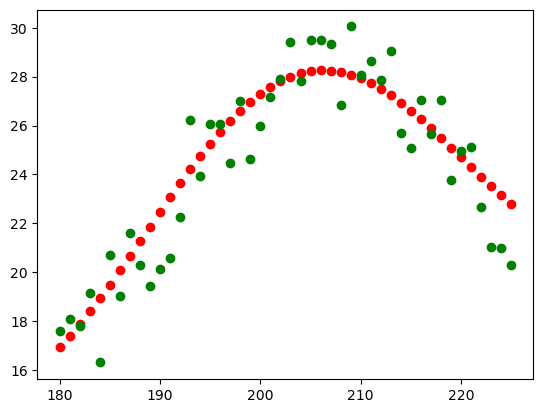

In [15]:
plt.scatter(X["x1"][l1+l2:], y_pred, color='red')
plt.scatter(X["x1"][l1+l2:], y_test, color="green")

# Question 2

In [16]:
data = pd.read_table("Assignment2.data")
data

,SpringPos,StockPrice
0,2.27,3.48
1,6.38,2.99
2,8.61,5.86
3,8.65,1.79
4,13.17,3.47
...,...,...
221,1.37,25.14
222,2.29,22.65
223,1.80,21.04
224,0.82,20.98


In [17]:
data.drop(columns=["StockPrice"], inplace=True)
data.rename(columns={"SpringPos": "y"}, inplace=True)
data

,y
0,2.27
1,6.38
2,8.61
3,8.65
4,13.17
...,...
221,1.37
222,2.29
223,1.80
224,0.82


In [18]:
x = np.arange(len(data)).reshape(-1, 1)  # Ensuring x is 2D
df = pd.concat([data, pd.DataFrame(x, columns=["x1"])], axis=1)
df

,y,x1
0,2.27,0
1,6.38,1
2,8.61,2
3,8.65,3
4,13.17,4
...,...,...
221,1.37,221
222,2.29,222
223,1.80,223
224,0.82,224


In [19]:
def generate_features(X, n, m):
    return np.hstack([X, np.sin(n * X) * np.exp(-m * X)])

In [20]:
class ModelWithN(BaseEstimator, RegressorMixin):
    def __init__(self, n=1, m=1):
        self.n = n
        self.m = m
        self.model = LinearRegression()

    def fit(self, X, y):
        X_transformed = generate_features(X, self.n, self.m)
        self.model.fit(X_transformed, y)
        return self  # Necessary for chaining

    def predict(self, X):
        X_transformed = generate_features(X, self.n, self.m)
        return self.model.predict(X_transformed)

    def score(self, X, y):
        y_pred = self.predict(X)
        return -mean_squared_error(y, y_pred)  # For GridSearchCV to minimize
    

In [21]:
y = df["y"]
X = df.drop(columns=["y"], inplace=False)

In [22]:
l1 = int(0.6*len(y))
l2 = int(0.2*len(y))
print(l1, l2)

135 45


In [23]:
X_train = X[:l1]
y_train = y[:l1]
X_cv = X[l1:l1+l2]
y_cv = y[l1:l1+l2]
X_test = X[l1+l2:]
y_test = y[l1+l2:]

In [24]:
param_grid = {'n': [0.01, 0.05, 0.1, 1, 5, 10, 20, 50, 100],
              'm': [0.01, 0.04, 0.05, 0.1, 1, 5, 10]}
grid_search = GridSearchCV(ModelWithN(), param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=ModelWithN(),
             param_grid={'m': [0.01, 0.04, 0.05, 0.1, 1, 5, 10],
                         'n': [0.01, 0.05, 0.1, 1, 5, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [25]:
y_pred = grid_search.predict(X)

In [26]:
best_n = grid_search.best_params_['n']
best_m = grid_search.best_params_['m']
print(best_m, best_n)

0.01 0.1


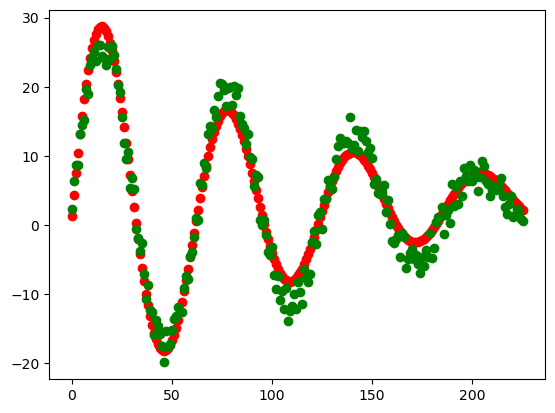

In [27]:
plt.scatter(X["x1"], y_pred, color='red')
plt.scatter(X["x1"], y, color="green")

In [28]:
mean_squared_error(y, y_pred)

5.181462561501867